In [24]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import re

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageDraw
from scipy import *
import skimage
from random import randint
import random

In [13]:
imgpathround = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/Images/round'
imgpathoblong = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/Images/oblong'
croppedpath = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/CroppedImages'

In [148]:
def splitround(imgpath):
    for img in os.listdir(imgpath):
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height), int(width*.5)
        cropped1 = img[startheight:endheight, startwidth:endwidth]
        cropped2 = img[startheight:endheight, endwidth:width]
        cv2.imwrite(os.path.join(croppedpath, '{}1.jpg'.format(imgname)), cropped1)
        cv2.imwrite(os.path.join(croppedpath, '{}2.jpg'.format(imgname)), cropped2)
        print(cropped1.shape)
    
def splitoblong(imgpath):
    for img in os.listdir(imgpath):
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height*.5), int(width)
        cropped1 = img[startheight:endheight, startwidth:endwidth]
        cropped2 = img[endheight:height, startwidth:endwidth]
        cv2.imwrite(os.path.join(croppedpath, '{}1.jpg'.format(imgname)), cropped1)
        cv2.imwrite(os.path.join(croppedpath, '{}2.jpg'.format(imgname)), cropped2)
        print(cropped1.shape)

In [137]:
def splitround(imgpath):    
    labels = []
    label = 0
    for img in os.listdir(imgpath):
        color = [138,138,138]
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height), int(width*.5)
        cropped1 = cv2.resize(img[startheight:endheight, startwidth:endwidth], (160,240))
        cropped2 = cv2.resize(img[startheight:endheight, endwidth:width], (160,240))
        cropped1 = cv2.copyMakeBorder(cropped1, 0,0,40,40, cv2.BORDER_CONSTANT, value=color)
        cropped2 = cv2.copyMakeBorder(cropped2, 0,0,40,40, cv2.BORDER_CONSTANT, value=color)
        degrees = list(range(0,360,10))
        height, width = cropped1.shape[0:2]
        
        for index, degree in enumerate(degrees):
            m = cv2.getRotationMatrix2D((width/2, height/2), degree, 1)
            rimg1 = cv2.warpAffine(cropped1, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}1r{}.jpg'.format(imgname, index)), rimg1)
            labels.append(label)
            rimg2 = cv2.warpAffine(cropped2, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}2r{}.jpg'.format(imgname, index)), rimg2)
            labels.append(label)
        label += 1
    return labels        

def splitoblong(imgpath):
    labels =[]
    label = 5
    for img in os.listdir(imgpath):
        color = [138,138,138]
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height*.5), int(width)
        cropped1 = cv2.resize(img[startheight:endheight, startwidth:endwidth], (240,90))
        cropped2 = cv2.resize(img[endheight:height, startwidth:endwidth], (240,90))
        cropped1 = cv2.copyMakeBorder(cropped1, 75,75,0,0, cv2.BORDER_CONSTANT, value=color)
        cropped2 = cv2.copyMakeBorder(cropped2, 75,75,0,0, cv2.BORDER_CONSTANT, value=color)
        degrees = list(range(0,360,10))
        height, width = cropped1.shape[0:2]
        
        for index, degree in enumerate(degrees):
            m = cv2.getRotationMatrix2D((width/2, height/2), degree, 1)
            rimg1 = cv2.warpAffine(cropped1, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}1r{}.jpg'.format(imgname, index)), rimg1)
            labels.append(label)
            rimg2 = cv2.warpAffine(cropped2, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}2r{}.jpg'.format(imgname, index)), rimg2)
            labels.append(label)
        label +=1
    return labels

In [142]:
labelsround = splitround(imgpathround)
labelsoblon = splitoblong(imgpathoblong)
labels = labelsround + labelsoblon

In [144]:
np.save('labels.npy', labels)

In [145]:
def createarray (imgpath):
    imgarraylist = []
    for img in tqdm(os.listdir(imgpath)):
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        img = img.astype(np.float32)
        imgarraylist.append(np.array(img))
    np.save('{}.npy'.format(imgpath), imgarraylist)
    return imgarraylist

In [146]:
imgarraylist = createarray(croppedpath)

100%|██████████| 720/720 [00:00<00:00, 750.44it/s]


In [150]:
splitround('C:/Users/JChaotogo/Documents/DataSets/Drugs/hi')

(216, 144, 3)


In [529]:
im = cv2.imread('C:/Users/JChaotogo/Documents/DataSets/Drugs/CroppedImages/oxy2.jpg')
cv2.imshow('im', im)

error: OpenCV(4.0.0) d:\build\opencv\opencv-4.0.0\modules\highgui\src\window.cpp:358: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [168]:
color = [181,185,190]
cropped2 = cv2.copyMakeBorder(im, 0,0,36,36, cv2.BORDER_CONSTANT, value=color)

In [169]:
cropped2 = cv2.resize(cropped2, (240, 240))

In [173]:
img = cropped2.astype(np.float32)
np.save('oxytest.npy', img)

In [ ]:
#Add background noise to image by altering the mask.

In [12]:
croppedfront = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/croppedfront'

In [343]:
def splitround(imgpath):    
    labels = []
    label = 0
    for img in os.listdir(imgpath):
        color = [138,138,138]
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height), int(width*.5)
        cropped1 = cv2.resize(img[startheight:endheight, startwidth:endwidth], (160,240))
        cropped1 = cv2.copyMakeBorder(cropped1, 0,0,40,40, cv2.BORDER_CONSTANT, value=color)
        degrees = list(range(0,360,10))
        height, width = cropped1.shape[0:2]
        
        for index, degree in enumerate(degrees):
            m = cv2.getRotationMatrix2D((width/2, height/2), degree, 1)
            rimg1 = cv2.warpAffine(cropped1, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedfront, '{}r{}.jpg'.format(label, index*10)), rimg1)
            labels.append(label)
        label += 1
    return labels        

def splitoblong(imgpath):
    labels =[]
    label = 5
    for img in os.listdir(imgpath):
        color = [138,138,138]
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height*.5), int(width)
        cropped1 = cv2.resize(img[startheight:endheight, startwidth:endwidth], (240,90))
        cropped1 = cv2.copyMakeBorder(cropped1, 75,75,0,0, cv2.BORDER_CONSTANT, value=color)
        degrees = list(range(0,360,10))
        height, width = cropped1.shape[0:2]
        
        for index, degree in enumerate(degrees):
            m = cv2.getRotationMatrix2D((width/2, height/2), degree, 1)
            rimg1 = cv2.warpAffine(cropped1, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedfront, '{}r{}.jpg'.format(label, index*10)), rimg1)
            labels.append(label)
        label +=1
    return labels

def createarray (imgpath):
    imgarraylist = []
    for img in tqdm(os.listdir(imgpath)):
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        img = img.astype(np.float32)
        imgarraylist.append(np.array(img))
    np.save('{}.npy'.format(imgpath), imgarraylist)
    return imgarraylist

In [344]:
labelsround = splitround(imgpathround)
labelsoblon = splitoblong(imgpathoblong)

In [182]:
labelsfront = labelsround + labelsoblon

In [192]:
def blurimage(imgpath):
    #== Parameters =======================================================================
    BLUR = 21
    CANNY_THRESH_1 = 10
    CANNY_THRESH_2 = 200
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0,0.0,1.0) # In BGR format
    for img in os.listdir(imgpath):
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        #Edge detection -------------------------------------------------------------------
        edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
        edges = cv2.dilate(edges, None)
        edges = cv2.erode(edges, None)

        #-- Find contours in edges, sort by area ---------------------------------------------
        contour_info = []
        contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for c in contours:
            contour_info.append((
                c,
                cv2.isContourConvex(c),
                cv2.contourArea(c),
            ))
        contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
        max_contour = contour_info[0]

        #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
        # Mask is black, polygon is white
        mask = np.zeros(edges.shape)
        cv2.fillConvexPoly(mask, max_contour[0], (255))

        #-- Smooth mask, then blur it --------------------------------------------------------
        mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
        mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
        mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
        mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

        #-- Blend masked img into MASK_COLOR background --------------------------------------
        mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
        img         = img.astype('float32') / 255.0                 #  for easy blending


        # split image into channels
        c_red, c_green, c_blue = cv2.split(img)

        # merge with mask got on one of a previous steps
        img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

        # show on screen (optional in jupiter)
        %matplotlib inline
        plt.imshow(1-img_a)
        plt.show()

In [331]:
def blurimage(imgpath):
    #== Parameters =======================================================================
    BLUR = 21
    CANNY_THRESH_1 = 10
    CANNY_THRESH_2 = 200
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0,0.0,1.0) # In BGR format
    label=0
    for img in os.listdir(imgpath):
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        noise = cv2.resize(cv2.imread('C:/Users/JChaotogo/Documents/DataSets/Drugs/noise/noise0.jpg'), (120,120))/255
        #Edge detection -------------------------------------------------------------------
        edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
        edges = cv2.dilate(edges, None)
        edges = cv2.erode(edges, None)

        #-- Find contours in edges, sort by area ---------------------------------------------
        contour_info = []
        contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for c in contours:
            contour_info.append((
                c,
                cv2.isContourConvex(c),
                cv2.contourArea(c),
            ))
        contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
        max_contour = contour_info[0]

        #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
        # Mask is black, polygon is white
        mask = np.zeros(edges.shape)
        cv2.fillConvexPoly(mask, max_contour[0], (255))

        #-- Smooth mask, then blur it --------------------------------------------------------
        mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
        mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
        mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
        mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

        #-- Blend masked img into MASK_COLOR background --------------------------------------
        mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
        img         = img.astype('float32') / 255.0                 #  for easy blending
        
        masked = (mask_stack * img) + ((1-mask_stack) * noise) # Blend
        masked = (masked * 255).astype('uint8')     
        cv2.imwrite(os.path.join(train, '{}m.jpg'.format(label)), masked)
        label += 1

In [19]:
def blurimage(imgpath):
    #== Parameters =======================================================================
    BLUR = 21
    
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (0.0,0.0,1.0) # In BGR format
    labels = []
    index = 61
    for img in os.listdir(imgpath):
        label = int(str(img)[0])
        labels.append(label)
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            
        noise = cv2.resize(cv2.imread('C:/Users/JChaotogo/Documents/DataSets/Drugs/noise/noise6.jpg'), (240,240))/255
        #Edge detection -------------------------------------------------------------------
        
        
        CANNY_THRESH_2, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        CANNY_THRESH_1 = 0.1*CANNY_THRESH_2
        
        
        edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
        edges = cv2.dilate(edges, None)
        edges = cv2.erode(edges, None)

        #-- Find contours in edges, sort by area ---------------------------------------------
        contour_info = []
        contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for c in contours:
            contour_info.append((
                c,
                cv2.isContourConvex(c),
                cv2.contourArea(c),
            ))
        contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
        max_contour = contour_info[0]

        #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
        # Mask is black, polygon is white
        mask = np.zeros(edges.shape)
        cv2.fillConvexPoly(mask, max_contour[0], (255))

        #-- Smooth mask, then blur it --------------------------------------------------------
        mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
        mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
        mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
        mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

        #-- Blend masked img into MASK_COLOR background --------------------------------------
        mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
        img         = img.astype('float32') / 255.0                 #  for easy blending
        
        #yellow = np.ones(img.shape, dtype=np.float)*(.8,1,1)
        masked = (mask_stack * img) + ((1-mask_stack) * noise) # Blend
        masked = (masked * 255).astype('uint8')     
        cv2.imwrite(os.path.join(finaltrain, '{}k{}.jpg'.format(label, index)), masked)
        index += 1
    return labels

In [476]:
croppedfront = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/croppedfront'
noisepath = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/noise'
train = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/train'

In [520]:
def createarray (imgpath):
    imgarraylist = []
    labels = []
    for img in tqdm(os.listdir(imgpath)):
        labels.append(int(img[0]))
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        img = cv2.resize(img, (100,100))
        img = img.astype(np.float32)
        imgarraylist.append(np.array(img))
    np.save('{}.npy'.format(imgpath), imgarraylist)
    return labels

In [521]:
labels = createarray('C:/Users/JChaotogo/Documents/DataSets/Drugs/train')

100%|██████████| 3927/3927 [00:05<00:00, 716.69it/s]


In [523]:
x = np.load('train.npy')

In [527]:
labels = np.array(labels)

In [528]:
np.save('labels1.npy', labels)

In [531]:
labels = createarray('C:/Users/JChaotogo/Documents/DataSets/Drugs/croppedfront')
labels = np.array(labels)
np.save('reglabels.npy', labels)

100%|██████████| 360/360 [00:00<00:00, 837.50it/s]


In [ ]:
def splitround(imgpath):    
    labels = []
    label = 0
    for img in os.listdir(imgpath):
        color = [138,138,138]
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height), int(width*.5)
        cropped1 = cv2.resize(img[startheight:endheight, startwidth:endwidth], (160,240))
        cropped2 = cv2.resize(img[startheight:endheight, endwidth:width], (160,240))
        cropped1 = cv2.copyMakeBorder(cropped1, 0,0,40,40, cv2.BORDER_CONSTANT, value=color)
        cropped2 = cv2.copyMakeBorder(cropped2, 0,0,40,40, cv2.BORDER_CONSTANT, value=color)
        degrees = list(range(0,360,10))
        height, width = cropped1.shape[0:2]
        
        for index, degree in enumerate(degrees):
            m = cv2.getRotationMatrix2D((width/2, height/2), degree, 1)
            rimg1 = cv2.warpAffine(cropped1, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}1r{}.jpg'.format(imgname, index)), rimg1)
            labels.append(label)
            rimg2 = cv2.warpAffine(cropped2, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}2r{}.jpg'.format(imgname, index)), rimg2)
            labels.append(label)
        label += 1
    return labels        

def splitoblong(imgpath):
    labels =[]
    label = 5
    for img in os.listdir(imgpath):
        color = [138,138,138]
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height*.5), int(width)
        cropped1 = cv2.resize(img[startheight:endheight, startwidth:endwidth], (240,90))
        cropped2 = cv2.resize(img[endheight:height, startwidth:endwidth], (240,90))
        cropped1 = cv2.copyMakeBorder(cropped1, 75,75,0,0, cv2.BORDER_CONSTANT, value=color)
        cropped2 = cv2.copyMakeBorder(cropped2, 75,75,0,0, cv2.BORDER_CONSTANT, value=color)
        degrees = list(range(0,360,10))
        height, width = cropped1.shape[0:2]
        
        for index, degree in enumerate(degrees):
            m = cv2.getRotationMatrix2D((width/2, height/2), degree, 1)
            rimg1 = cv2.warpAffine(cropped1, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}1r{}.jpg'.format(imgname, index)), rimg1)
            labels.append(label)
            rimg2 = cv2.warpAffine(cropped2, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}2r{}.jpg'.format(imgname, index)), rimg2)
            labels.append(label)
        label +=1
    return labels

In [540]:
def roundpreprocess(img):
    import math
    img = cv2.imread(img)
    height, width = img.shape[0:2]
    startheight, startwidth = int(0), int(0)
    endheight, endwidth = int(height), int(width*.5)
    cropped1 = img[startheight:endheight, startwidth:endwidth]
    height, width = cropped1.shape[0:2]
    cropped1 = cv2.copyMakeBorder(cropped1, 0,0, int(math.floor(height-width)/2), int(math.ceil(height-width)/2),
                                  cv2.BORDER_REPLICATE)
    cropped1 = cv2.resize(cropped1, (100,100))
    cropped1 = cropped1.astype(np.float32)
    cropped1 = np.array(cropped1)
    plt.imshow(cropped1/255)
    cropped1 = np.expand_dims(cropped1, axis=0)
    return cropped1

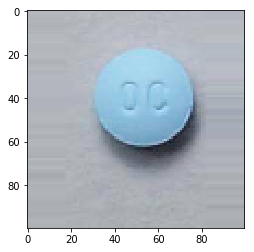

In [631]:
x = roundpreprocess('C:/Users/JChaotogo/Documents/DataSets/Drugs/hi/oxy.jpg')
img = cv2.imread('C:/Users/JChaotogo/Documents/DataSets/Drugs/hi/oxy.jpg',1)
img = np.array(img)


In [ ]:
def splitround(imgpath):    
    labels = []
    label = 0
    for img in os.listdir(imgpath):
        color = [138,138,138]
        imgname = img.replace('.jpg', '')
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        startheight, startwidth = int(0), int(0)
        endheight, endwidth = int(height), int(width*.5)
        cropped1 = cv2.resize(img[startheight:endheight, startwidth:endwidth], (160,240))
        cropped2 = cv2.resize(img[startheight:endheight, endwidth:width], (160,240))
        cropped1 = cv2.copyMakeBorder(cropped1, 0,0,40,40, cv2.BORDER_CONSTANT, value=color)
        cropped2 = cv2.copyMakeBorder(cropped2, 0,0,40,40, cv2.BORDER_CONSTANT, value=color)
        degrees = list(range(0,360,10))
        height, width = cropped1.shape[0:2]
        
        for index, degree in enumerate(degrees):
            m = cv2.getRotationMatrix2D((width/2, height/2), degree, 1)
            rimg1 = cv2.warpAffine(cropped1, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}1r{}.jpg'.format(imgname, index)), rimg1)
            labels.append(label)
            rimg2 = cv2.warpAffine(cropped2, m, (width, height), cv2.BORDER_CONSTANT, borderValue=color)
            cv2.imwrite(os.path.join(croppedpath, '{}2r{}.jpg'.format(imgname, index)), rimg2)
            labels.append(label)
        label += 1
    return labels        


In [15]:
finaltrain = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/finaltrain'
imgpath = 'C:/Users/JChaotogo/Documents/DataSets/Drugs/CroppedImages'

In [23]:
#IMAGE AUGMENTATIONS FOR FINAL TRAIN

def rotateimage(imgpath):
    index = 0
    for img in os.listdir(imgpath):
        label = int(str(img)[0])
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        height, width = img.shape[0:2]
        m = cv2.getRotationMatrix2D((width/2, height/2), randint(10,30), 1)
        m2= cv2.getRotationMatrix2D((width/2, height/2), randint(330,350), 1)
        rimg1 = cv2.warpAffine(img, m, (width, height), cv2.BORDER_CONSTANT, borderValue=[138,138,138])
        rimg2 = cv2.warpAffine(img, m2, (width, height), cv2.BORDER_CONSTANT, borderValue=[138,138,138])
        cv2.imwrite(os.path.join(finaltrain, '{}r{}.jpg'.format(label, index)), rimg1)
        cv2.imwrite(os.path.join(finaltrain, '{}r{}.jpg'.format(label, index+1)), rimg2)
        index += 1

def blurimage(imgpath):
    index = 0
    for img in os.listdir(imgpath):
        label = int(str(img)[0])
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        blur = random.randrange(1,5,2)
        img = cv2.GaussianBlur(img, (blur,blur),0)
        cv2.imwrite(os.path.join(finaltrain, '{}b{}.jpg'.format(label, index)), img)
        index += 1

def adjustgamma(imgpath):
    index = 0
    '''brighten = 1.0/range(1.5,3, .5)
    darken = 1.0/range(.25, 1, .25)'''
    tabledark = np.array([((i/255.0)**1.5)*255 for i in np.arange(0,256)]).astype('uint8')
    tablebright = np.array([((i/255.0)**.5)*255 for i in np.arange(0,256)]).astype('uint8')
    for img in os.listdir(imgpath):
        label = int(str(img)[0])
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        img1 = cv2.LUT(img.astype(np.uint8), tabledark.astype(np.uint8))
        img2 = cv2.LUT(img.astype(np.uint8), tablebright.astype(np.uint8))
        cv2.imwrite(os.path.join(finaltrain, '{}d{}.jpg'.format(label, index)), img1)
        cv2.imwrite(os.path.join(finaltrain, '{}l{}.jpg'.format(label, index+1)), img2)
        index += 1

def zoomimage(imgpath):
    index=1
    for img in os.listdir(imgpath):
        label = int(str(img)[0])
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        x = random.randint(70, 120)
        img = cv2.copyMakeBorder(img, x, x, x, x, cv2.BORDER_REPLICATE)
        cv2.imwrite(os.path.join(finaltrain, '{}z{}.jpg'.format(label, index)), img)
        index+=1

def shiftimage(imgpath):
    index=0
    for img in os.listdir(imgpath):
        label = int(str(img)[0])
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        x = random.randrange(0, 40, 10)
        y = random.randrange(20,50,10)
        height, width = img.shape[0:2]
        m = np.float32([[1, 0, x], [0,1,y]])
        img = cv2.warpAffine(img, m, (height, width), cv2.BORDER_CONSTANT, borderValue=[138,138,138])
        cv2.imwrite(os.path.join(finaltrain, '{}s{}.jpg'.format(label, index)), img)
        index+=1
zoomimage(finaltrain)

In [5]:
#GENERATE ARRAY AND LABELS FOR FINALTRAIN
def createarray (imgpath):
    imgarraylist = []
    labels = []
    for img in tqdm(os.listdir(imgpath)):
        labels.append(int(img[0]))
        path = os.path.join(imgpath, img)
        img = cv2.imread(path)
        img = cv2.resize(img, (100,100))
        img = img.astype(np.float32)
        imgarraylist.append(np.array(img))
    np.save('oneshottrain.npy', imgarraylist)
    np.save('oneshotlabels.npy', labels)

createarray(finaltrain)


NameError: name 'finaltrain' is not defined

In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/JChaotogo/Desktop/pillinfo.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,NDC9,author,SPLCOLOR,SPLSHAPE,SPLSIZE,SPLSCORE,DEA_SCHEDULE_CODE,INGREDIENTS,RXCUI,RXTTY,RXSTRING,image_id,IMAGE_SOURCE,HAS_IMAGE
0,0,50,508440175,"L.N.K. International, Inc.",C48325,C48345,17.0,1,NaN,ACETAMINOPHEN[ACETAMINOPHEN],198440.0,SCD,Acetaminophen 500 MG Oral Tablet,50844-0175-10_NLMIMAGE10_5135A8AD,NLMIMAGE10,1
1,1,58,705180901,REMEDYREPACK INC.,C48330,C48348,7.0,2,NaN,MIRTAZAPINE[MIRTAZAPINE],311725.0,SCD,Mirtazapine 15 MG Oral Tablet,00093720656,SPL,1
2,3,71,7811034,Sandoz Inc,C48327,C48348,8.0,1,NaN,TRIFLUOPERAZINE HYDROCHLORIDE[TRIFLUOPERAZINE],198325.0,SCD,Trifluoperazine 5 MG Oral Tablet,007811034,VA2,1
3,4,79,597620145,Greenstone LLC,C48326,C48336,18.0,1,NaN,PIROXICAM[PIROXICAM],198108.0,SCD,Piroxicam 20 MG Oral Capsule,59762-0145-01_NLMIMAGE10_333E99F4,RXIMAGE30,1
4,5,87,604290622,"Golden State Medical Supply, Inc.",C48325,C48348,9.0,1,NaN,OLANZAPINE[OLANZAPINE],312079.0,SCD,olanzapine 7.5 MG Oral Tablet,604290622,VA2,1


In [25]:
PATH = 'C:/Users/JChaotogo/Documents/DataSets/drugstocolab'
allpillspath = 'C:/Users/JChaotogo/Downloads/allpills'

#List of brand name drugs I want to identify
brandname = ['viagra', 'synthroid', 'oxycontin', 'percocet', 'lyrica', 'lipitor', 'glucophage', 'crestor', 'abilify', 'nexium']
for item in brandname:
  temp = df[df.RXSTRING.str.contains(f'[{item}]', case=False, regex=False)]

  for imid in temp.image_id:
    suffix = '.jpg'
    imid = str(imid)
    path = os.path.join(allpillspath, imid + suffix)
    img = cv2.imread(path)
    path = os.path.join(PATH, f'{item}', imid+suffix)
    cv2.imwrite(path, img)
    
    if os.path.join(allpillspath, imid) in os.listdir(allpillspath):
      

      path = os.path.join(allpillspath, imgid)
      img = cv2.imread(path)
      cv2.imwrite(os.path.join(PATH,imid), img)
      height, width = img.shape[0:2]
      